# Final Project
# IS- 567 (Text Mining)
# Fall'22
# Muhammad Ibrahim Mian - UIN: 673846900

## Importing Libraries

In [1]:
import requests
import shutil
import os
import re
import datetime as dt
import sys
import pandas as pd
import numpy as np
import zipfile as zf
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import contractions
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath
from sklearn.svm import LinearSVC
nltk.download('wordnet')
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from collections import Counter
from pprint import pprint
import en_core_web_sm

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mianmuhammadibrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mianmuhammadibrahim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Downloading Data from weblink and converting into a CSV zip file

In [2]:
# Opening file in dataframe

df= pd.read_csv('/Users/mianmuhammadibrahim/Documents/UIUC/Thrid Semester - Fall 2022/IS 567 - Text Mining/Project/enron_spam_data.zip',compression='zip')

In [3]:
# Print dataframe

df.sample(10)

,Message ID,Subject,Message,Spam/Ham,Date
19611,19611,upses,650 va\n$ 29 . 50\n800 va\n$ 42 . 50\n1000 va\...,spam,2005-08-27
27992,27992,scans,i have included four files . they are labeled ...,ham,2001-04-10
6431,6431,global risk management initiative,"rick ,\ni read your memo regarding global risk...",ham,2000-01-18
27171,27171,returned mail : can ' t create output,"the original message was received at tue , 19 ...",spam,2005-07-19
13524,13524,longview dash,"louise ,\na dash should hit your desk tomorrow...",ham,2001-07-26
15136,15136,help,"dear friend ,\ni am mrs iyesa ismiana , named ...",spam,2004-09-16
29710,29710,NaN,the permanent fix to penis enlargement\nlimite...,spam,2004-10-05
30043,30043,real man looking for a girl,goodbye\ngangway sexyappend brent varietyendow...,spam,2004-12-08
25410,25410,pieza del mes de julio / 2005,"visita en la casa de la ciudad , la pieza del ...",spam,2005-07-05
4743,4743,"discreet vlagra , no one needs to know .","today ' s special :\nv - i - a - g - r - a , r...",spam,2004-09-30


## Preprocessing of data

In [4]:
# Read data and print out column types and total data in set

data_df = pd.read_csv('/Users/mianmuhammadibrahim/Documents/UIUC/Thrid Semester - Fall 2022/IS 567 - Text Mining/Project/enron_spam_data.zip',compression='zip')

print ("All data: ", len(data_df))
print ("\n Columns in Dataset: \n", data_df.dtypes)
data_df.head()

All data:  33716

 Columns in Dataset: 
 Message ID     int64
Subject       object
Message       object
Spam/Ham      object
Date          object
dtype: object


,Message ID,Subject,Message,Spam/Ham,Date
0,0,ena sales on hpl,just to update you on this project ' s status ...,ham,2000-05-10
1,1,98 - 6736 & 98 - 9638 for 1997 ( ua 4 issues ),the above referenced meters need to be placed ...,ham,2000-02-18
2,2,"hpl nominations for december 28 , 1999",( see attached file : hpll 228 . xls )\n- hpll...,ham,1999-12-27
3,3,revised nom - kcs resources,"daren ,\nit ' s in .\nbob\n- - - - - - - - - -...",ham,2000-06-29
4,4,new production - sitara deals needed,"daren ,\nfyi .\nbob\n- - - - - - - - - - - - -...",ham,2000-07-28


In [5]:
# Print out Spam and Ham values

print(data_df['Spam/Ham'].value_counts())

spam    17171
ham     16545
Name: Spam/Ham, dtype: int64


In [6]:
#Checking Null Values in column ('Message')

print("Null Values in Message:",data_df['Message'].isna().sum())

print("Null Values in Ham/Spam:",data_df['Spam/Ham'].isna().sum())

#Drop Rows with NA Values in column ('Message')

data_df.dropna(subset=['Message'],inplace=True)

print ("\nAll data: ", len(data_df),"\n")

print(data_df['Spam/Ham'].value_counts())

Null Values in Message: 371
Null Values in Ham/Spam: 0

All data:  33345 

spam    16852
ham     16493
Name: Spam/Ham, dtype: int64


In [7]:
# We can see many spam emails were removed as compared to ham emails which makes sense

In [8]:
#Convert Column (reviewText) to lowercase

data_df['PreMessage'] = data_df['Message'].str.lower()

print(data_df.Message.tolist()[557])
print("\n")
print(data_df.Message.tolist()[3000])
print("\n")
print(data_df.Message.tolist()[7200])
print("\n")

# Remove spaces between puntuation marks

data_df['PreMessage'] = data_df['PreMessage'].replace(to_replace ="\s*@\s", value = "@", regex = True)
data_df['PreMessage'] = data_df['PreMessage'].replace(to_replace ="\s*'\s", value = "'", regex = True)
data_df['PreMessage'] = data_df['PreMessage'].replace(to_replace ="\s*,\s", value = ",", regex = True)
data_df['PreMessage'] = data_df['PreMessage'].replace(to_replace ="\s*:\s", value = ":", regex = True)
data_df['PreMessage'] = data_df['PreMessage'].replace(to_replace ="\s*/\s", value = "/", regex = True)

# Remove Contractions
data_df['PreMessage']=data_df.apply(lambda x: contractions.fix(x['PreMessage']), axis=1)

#Only keep alpha numeric text in Column (reviewText)

data_df['PreMessage']= data_df.PreMessage.str.replace('www', ' ')
data_df['PreMessage']= data_df.PreMessage.str.replace('http?://\S+|www\.\S+', ' ')
data_df['PreMessage']= data_df.PreMessage.str.replace('. com/',' ')
data_df['PreMessage']= data_df.PreMessage.str.replace('[^A-Za-z0-9]+', ' ')

data_df['CleanedMessage']= data_df.PreMessage

print(data_df.CleanedMessage.tolist()[557])
print("\n")
print(data_df.CleanedMessage.tolist()[3000])
print("\n")
print(data_df.CleanedMessage.tolist()[7200])
print("\n")

gentlemen :
please review and let me know if you have any questions .
for scheduling purposes , we will show a receipt from hpl ( transportation
agreement # 4047 ) at agua dulce of 45 , 000 , with deliveries to :
air products - la porte 5 , 000
oxy battleground 10 , 000
rohm & haas dp 20 , 000
dupont dp 10 , 000
dwight : you will need to coordinate these flow changes with the facilities .
thanks ,
>
this email and any files transmitted with it from the elpaso
corporation are confidential and intended solely for the
use of the individual or entity to whom they are addressed .
if you have received this email in error please notify the
sender .
- smartpigging ( 812 - lomax ) market takes plan final . xls


lone star pipeline
lisa mcauliff ( contracts ) wilma easter ( scheduling )
phone : 214 - 875 - 5224 phone : 214 - 875 - 3296
fax : 214 - 875 - 5134 fax : 214 - 875 - 3810
301 s . harwood # 801 n
dallas , tx 75201
williams energy
jeff goforth
phone : 918 - 573 - 8125
fax : 918 - 573 - 15

/var/folders/66/5b459gxn4h3dmkcqftc846sh0000gn/T/ipykernel_87186/2819187.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['PreMessage']= data_df.PreMessage.str.replace('http?://\S+|www\.\S+', ' ')
/var/folders/66/5b459gxn4h3dmkcqftc846sh0000gn/T/ipykernel_87186/2819187.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['PreMessage']= data_df.PreMessage.str.replace('. com/',' ')
/var/folders/66/5b459gxn4h3dmkcqftc846sh0000gn/T/ipykernel_87186/2819187.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['PreMessage']= data_df.PreMessage.str.replace('[^A-Za-z0-9]+', ' ')


gentlemen please review and let me know if you have any questions for scheduling purposes we will show a receipt from hpl transportation agreement 4047 at agua dulce of 45 000 with deliveries to air products la porte 5 000 oxy battleground 10 000 rohm haas dp 20 000 dupont dp 10 000 dwight you will need to coordinate these flow changes with the facilities thanks this email and any files transmitted with it from the elpaso corporation are confidential and intended solely for the use of the individual or entity to whom they are addressed if you have received this email in error please notify the sender smartpigging 812 lomax market takes plan final xls


lone star pipeline lisa mcauliff contracts wilma easter scheduling phone 214 875 5224 phone 214 875 3296 fax 214 875 5134 fax 214 875 3810 301 s harwood 801 n dallas tx 75201 williams energy jeff goforth phone 918 573 8125 fax 918 573 1530 po box 2848 tulsa ok 74101 cinergy marketing trading agent for apache lisa hughes phone 281 583 627

In [9]:
# Tokenize using NLTK

data_df['TokenizedMessage']=data_df['CleanedMessage'].apply(lambda x: word_tokenize(x))
detoken=TreebankWordDetokenizer()
data_df['TokenizedMessageJoined'] = data_df['TokenizedMessage'].apply(lambda x: detoken.detokenize(x))

data_df.head()

,Message ID,Subject,Message,Spam/Ham,Date,PreMessage,CleanedMessage,TokenizedMessage,TokenizedMessageJoined
0,0,ena sales on hpl,just to update you on this project ' s status ...,ham,2000-05-10,just to update you on this project s status ba...,just to update you on this project s status ba...,"[just, to, update, you, on, this, project, s, ...",just to update you on this project s status ba...
1,1,98 - 6736 & 98 - 9638 for 1997 ( ua 4 issues ),the above referenced meters need to be placed ...,ham,2000-02-18,the above referenced meters need to be placed ...,the above referenced meters need to be placed ...,"[the, above, referenced, meters, need, to, be,...",the above referenced meters need to be placed ...
2,2,"hpl nominations for december 28 , 1999",( see attached file : hpll 228 . xls )\n- hpll...,ham,1999-12-27,see attached file hpll 228 xls hpll 228 xls,see attached file hpll 228 xls hpll 228 xls,"[see, attached, file, hpll, 228, xls, hpll, 22...",see attached file hpll 228 xls hpll 228 xls
3,3,revised nom - kcs resources,"daren ,\nit ' s in .\nbob\n- - - - - - - - - -...",ham,2000-06-29,daren it is in bob forwarded by robert cotten ...,daren it is in bob forwarded by robert cotten ...,"[daren, it, is, in, bob, forwarded, by, robert...",daren it is in bob forwarded by robert cotten ...
4,4,new production - sitara deals needed,"daren ,\nfyi .\nbob\n- - - - - - - - - - - - -...",ham,2000-07-28,daren fyi bob forwarded by robert cotten hou e...,daren fyi bob forwarded by robert cotten hou e...,"[daren, fyi, bob, forwarded, by, robert, cotte...",daren fyi bob forwarded by robert cotten hou e...


In [10]:
# Remove Stop Words

stop_words = set(stopwords.words('english'))

data_df['StopwordRemovedMessage']=data_df['TokenizedMessage'].apply(lambda x: [item for item in x if item not in stop_words])
data_df.head()

,Message ID,Subject,Message,Spam/Ham,Date,PreMessage,CleanedMessage,TokenizedMessage,TokenizedMessageJoined,StopwordRemovedMessage
0,0,ena sales on hpl,just to update you on this project ' s status ...,ham,2000-05-10,just to update you on this project s status ba...,just to update you on this project s status ba...,"[just, to, update, you, on, this, project, s, ...",just to update you on this project s status ba...,"[update, project, status, based, new, report, ..."
1,1,98 - 6736 & 98 - 9638 for 1997 ( ua 4 issues ),the above referenced meters need to be placed ...,ham,2000-02-18,the above referenced meters need to be placed ...,the above referenced meters need to be placed ...,"[the, above, referenced, meters, need, to, be,...",the above referenced meters need to be placed ...,"[referenced, meters, need, placed, k, please, ..."
2,2,"hpl nominations for december 28 , 1999",( see attached file : hpll 228 . xls )\n- hpll...,ham,1999-12-27,see attached file hpll 228 xls hpll 228 xls,see attached file hpll 228 xls hpll 228 xls,"[see, attached, file, hpll, 228, xls, hpll, 22...",see attached file hpll 228 xls hpll 228 xls,"[see, attached, file, hpll, 228, xls, hpll, 22..."
3,3,revised nom - kcs resources,"daren ,\nit ' s in .\nbob\n- - - - - - - - - -...",ham,2000-06-29,daren it is in bob forwarded by robert cotten ...,daren it is in bob forwarded by robert cotten ...,"[daren, it, is, in, bob, forwarded, by, robert...",daren it is in bob forwarded by robert cotten ...,"[daren, bob, forwarded, robert, cotten, hou, e..."
4,4,new production - sitara deals needed,"daren ,\nfyi .\nbob\n- - - - - - - - - - - - -...",ham,2000-07-28,daren fyi bob forwarded by robert cotten hou e...,daren fyi bob forwarded by robert cotten hou e...,"[daren, fyi, bob, forwarded, by, robert, cotte...",daren fyi bob forwarded by robert cotten hou e...,"[daren, fyi, bob, forwarded, robert, cotten, h..."


In [11]:
# Perform Lemmatization

lemmatizer = WordNetLemmatizer()

data_df['LamitizedReview'] = data_df['StopwordRemovedMessage'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

# Join Back Column(StemmedReview) to sentence

detoken=TreebankWordDetokenizer()
data_df['ProcessedMessage'] = data_df['LamitizedReview'].apply(lambda x: detoken.detokenize(x))

In [12]:
data_df.head()

,Message ID,Subject,Message,Spam/Ham,Date,PreMessage,CleanedMessage,TokenizedMessage,TokenizedMessageJoined,StopwordRemovedMessage,LamitizedReview,ProcessedMessage
0,0,ena sales on hpl,just to update you on this project ' s status ...,ham,2000-05-10,just to update you on this project s status ba...,just to update you on this project s status ba...,"[just, to, update, you, on, this, project, s, ...",just to update you on this project s status ba...,"[update, project, status, based, new, report, ...","[update, project, status, based, new, report, ...",update project status based new report scott m...
1,1,98 - 6736 & 98 - 9638 for 1997 ( ua 4 issues ),the above referenced meters need to be placed ...,ham,2000-02-18,the above referenced meters need to be placed ...,the above referenced meters need to be placed ...,"[the, above, referenced, meters, need, to, be,...",the above referenced meters need to be placed ...,"[referenced, meters, need, placed, k, please, ...","[referenced, meter, need, placed, k, please, n...",referenced meter need placed k please note inf...
2,2,"hpl nominations for december 28 , 1999",( see attached file : hpll 228 . xls )\n- hpll...,ham,1999-12-27,see attached file hpll 228 xls hpll 228 xls,see attached file hpll 228 xls hpll 228 xls,"[see, attached, file, hpll, 228, xls, hpll, 22...",see attached file hpll 228 xls hpll 228 xls,"[see, attached, file, hpll, 228, xls, hpll, 22...","[see, attached, file, hpll, 228, xl, hpll, 228...",see attached file hpll 228 xl hpll 228 xl
3,3,revised nom - kcs resources,"daren ,\nit ' s in .\nbob\n- - - - - - - - - -...",ham,2000-06-29,daren it is in bob forwarded by robert cotten ...,daren it is in bob forwarded by robert cotten ...,"[daren, it, is, in, bob, forwarded, by, robert...",daren it is in bob forwarded by robert cotten ...,"[daren, bob, forwarded, robert, cotten, hou, e...","[daren, bob, forwarded, robert, cotten, hou, e...",daren bob forwarded robert cotten hou ect 06 2...
4,4,new production - sitara deals needed,"daren ,\nfyi .\nbob\n- - - - - - - - - - - - -...",ham,2000-07-28,daren fyi bob forwarded by robert cotten hou e...,daren fyi bob forwarded by robert cotten hou e...,"[daren, fyi, bob, forwarded, by, robert, cotte...",daren fyi bob forwarded by robert cotten hou e...,"[daren, fyi, bob, forwarded, robert, cotten, h...","[daren, fyi, bob, forwarded, robert, cotten, h...",daren fyi bob forwarded robert cotten hou ect ...


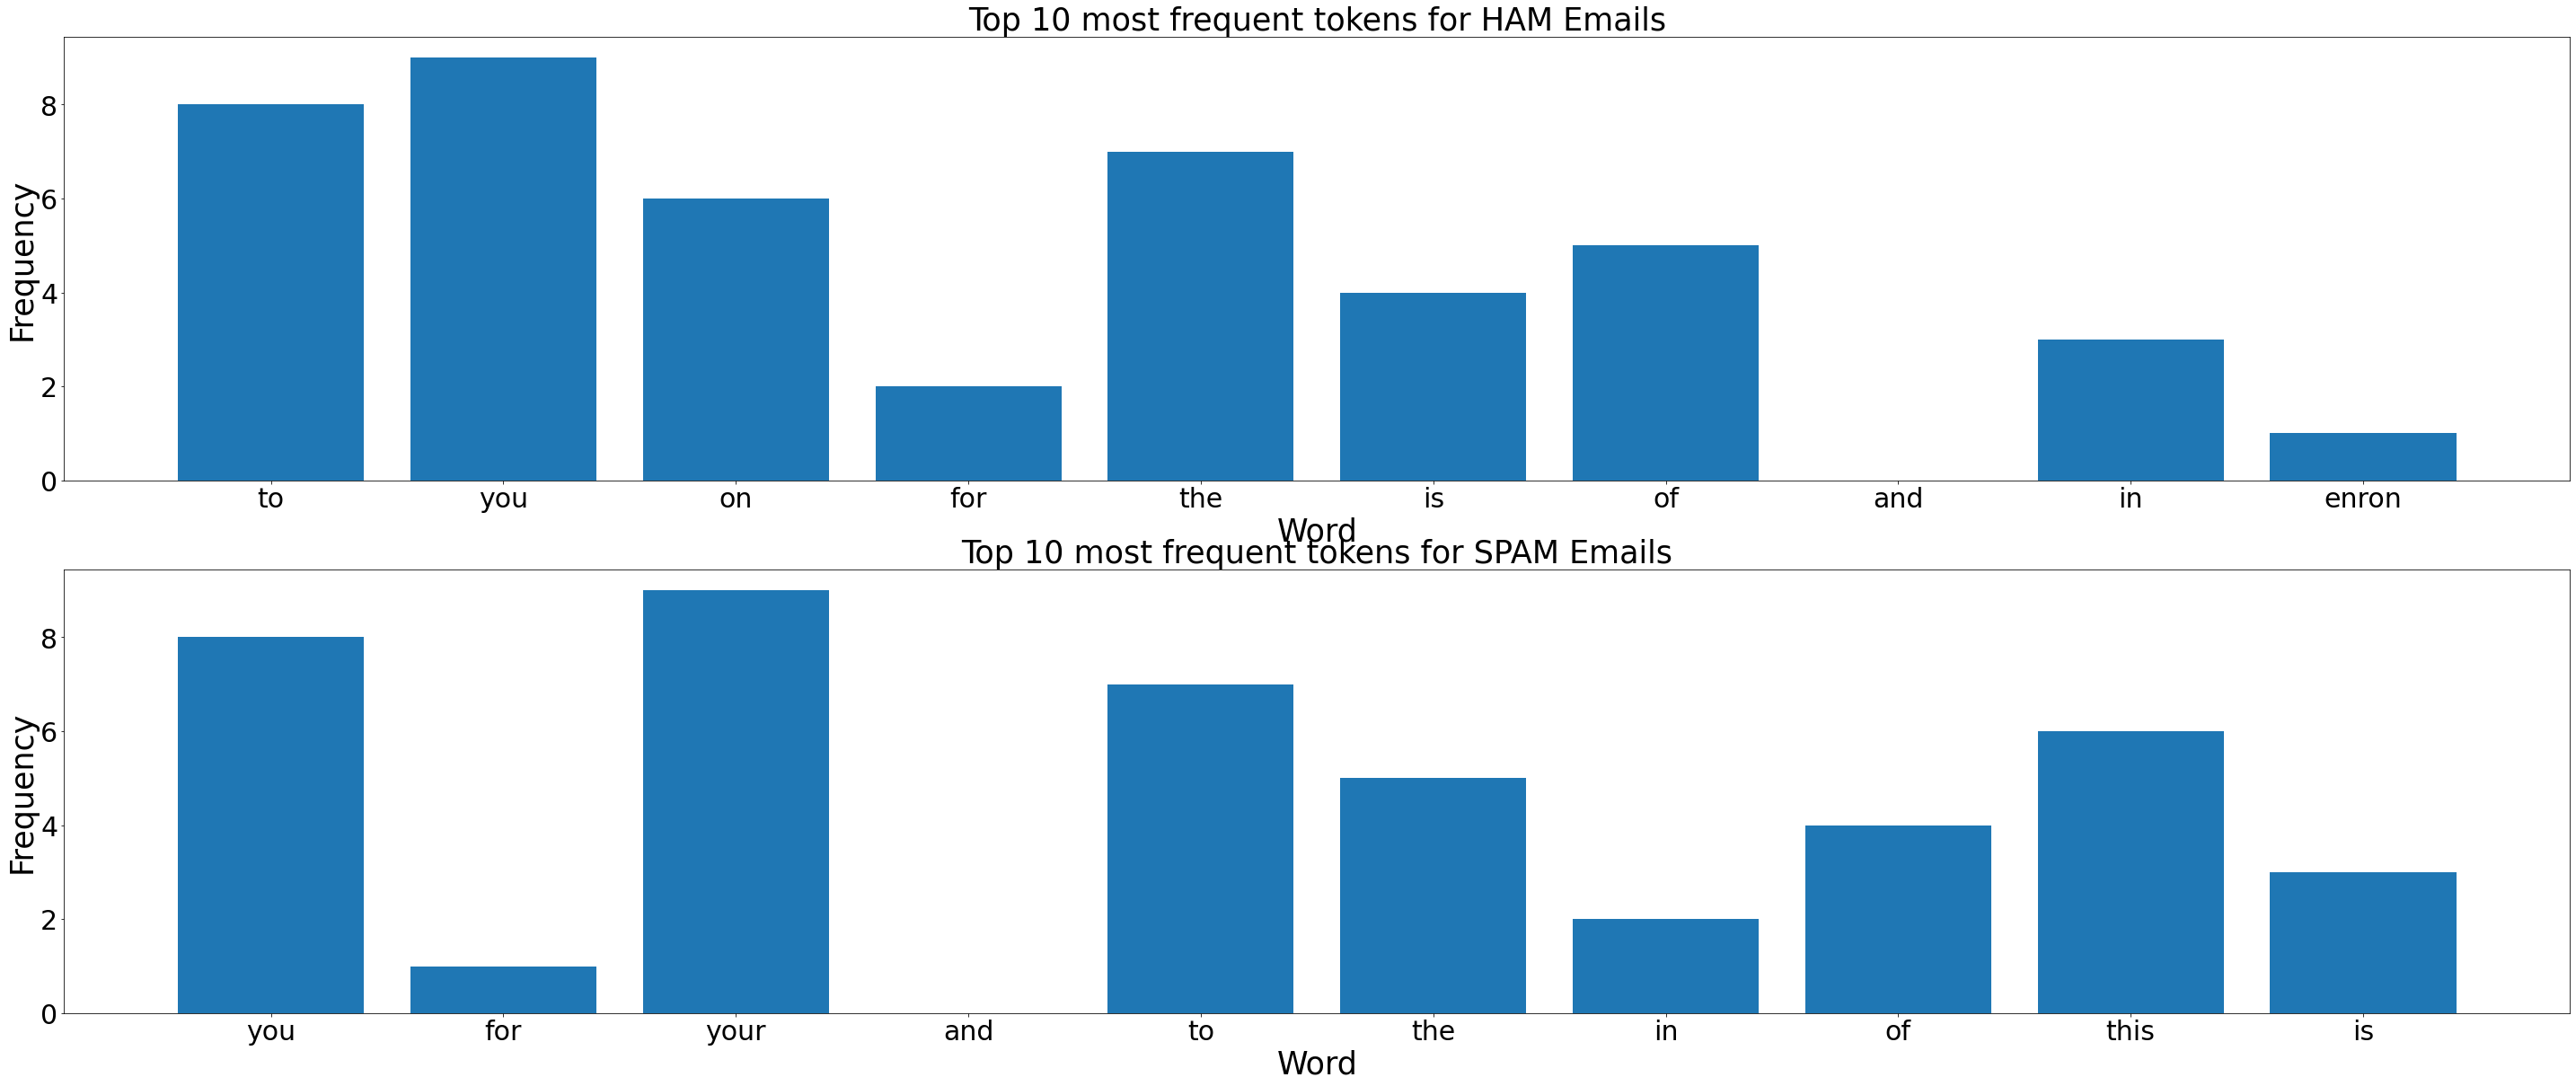

In [13]:
#Plot for Tokenized Words

ham = data_df.loc[data_df['Spam/Ham']=='ham','TokenizedMessageJoined']
spam = data_df.loc[data_df['Spam/Ham']=='spam','TokenizedMessageJoined']

vectorizer = CountVectorizer(max_features=10)

vectorizer.fit(ham)
ham_dict=vectorizer.vocabulary_

vectorizer.fit(spam)
spam_dict=vectorizer.vocabulary_

plt.figure(figsize=(50,20))

plt.subplot(2, 1, 1)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Top 10 most frequent tokens for HAM Emails",fontsize = 35)
plt.xlabel("Word",fontsize = 35)
plt.ylabel("Frequency",fontsize = 35)
plt.bar(ham_dict.keys(), ham_dict.values())

plt.subplot(2, 1, 2)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Top 10 most frequent tokens for SPAM Emails",fontsize = 35)
plt.xlabel("Word",fontsize = 35)
plt.ylabel("Frequency",fontsize = 35)
plt.bar(spam_dict.keys(), spam_dict.values())

plt.show()

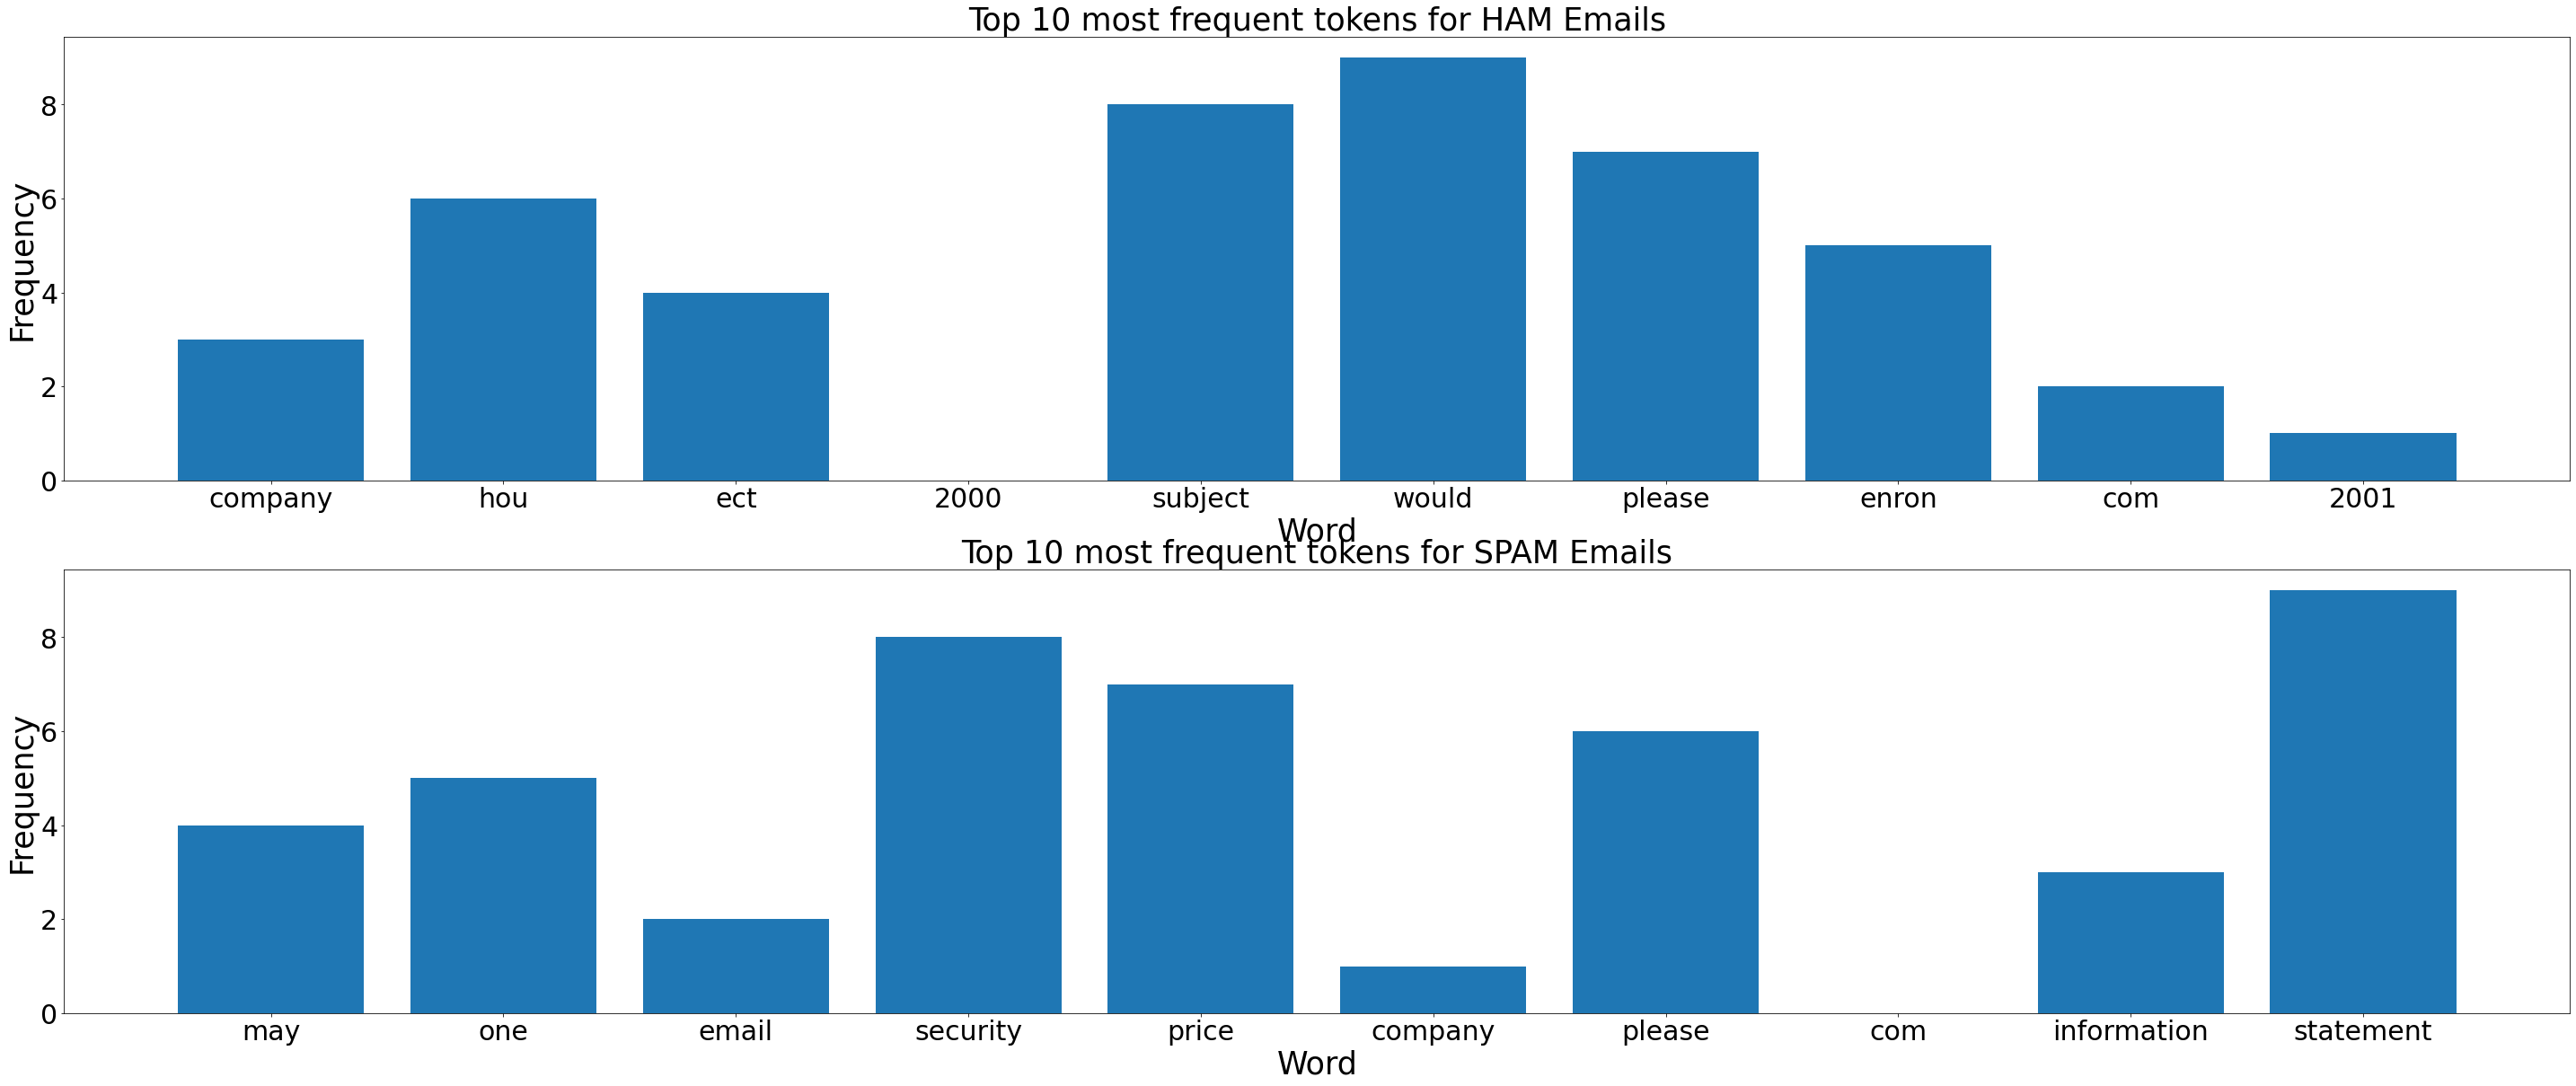

In [14]:
#Plot for stopwords removed Token

ham = data_df.loc[data_df['Spam/Ham']=='ham','ProcessedMessage']
spam = data_df.loc[data_df['Spam/Ham']=='spam','ProcessedMessage']

vectorizer = CountVectorizer(max_features=10)

vectorizer.fit(ham)
ham_dict=vectorizer.vocabulary_

vectorizer.fit(spam)
spam_dict=vectorizer.vocabulary_

plt.figure(figsize=(50,20))

plt.subplot(2, 1, 1)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Top 10 most frequent tokens for HAM Emails",fontsize = 35)
plt.xlabel("Word",fontsize = 35)
plt.ylabel("Frequency",fontsize = 35)
plt.bar(ham_dict.keys(), ham_dict.values())

plt.subplot(2, 1, 2)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Top 10 most frequent tokens for SPAM Emails",fontsize = 35)
plt.xlabel("Word",fontsize = 35)
plt.ylabel("Frequency",fontsize = 35)
plt.bar(spam_dict.keys(), spam_dict.values())

plt.show()

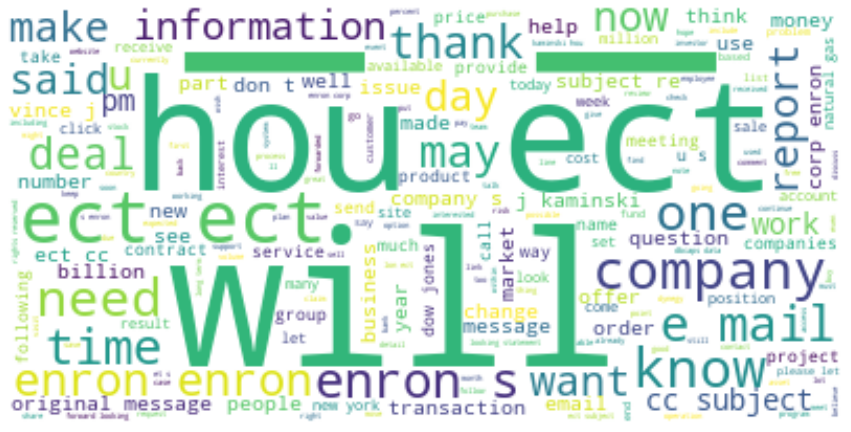

In [15]:
# Wordcloud (Messages)

text = " ".join(i for i in data_df.Message)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

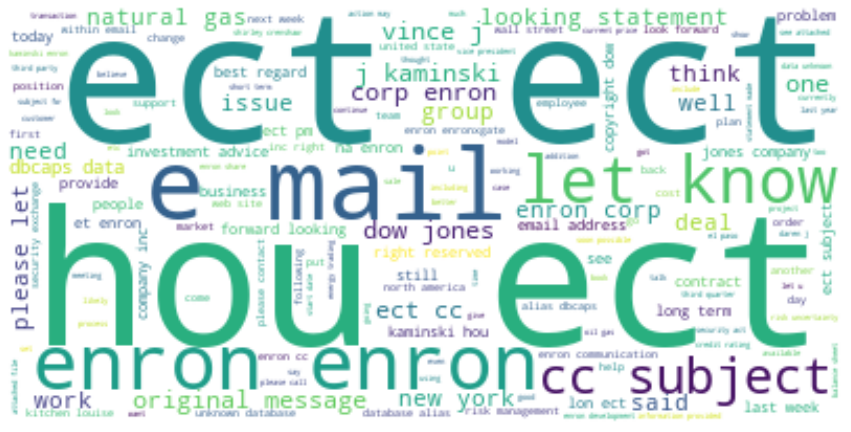

In [16]:
# Wordcloud (ProcessedMessage)

text = " ".join(i for i in data_df.ProcessedMessage)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#Loading Spacy Models

message = data_df.Message.tolist()[203]

nlp = spacy.load("en_core_web_sm")

In [18]:
#POS Tagging

nlp = spacy.load("en_core_web_sm")
doc = nlp(message)
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}}')

can        AUX        MD        
you        PRON       PRP       
help       VERB       VB        
me         PRON       PRP       
out        ADP        RP        
on         ADP        IN        
this       DET        DT        
darren     NOUN       NN        
?          PUNCT      .         
mjj        PROPN      NNP       

          SPACE      _SP       
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-          PUNCT      HYPH      
-         

In [19]:
#Clucking

doc = nlp(message)    

# visualize sentence dependencies
displacy.render(doc, style='dep', jupyter = True, options = {'distance': 100})


In [20]:
#Name Entity Relation

doc = nlp(message)
print(message)
pprint([(X.text, X.label_) for X in doc.ents])

can you help me out on this darren ? mjj
- - - - - - - - - - - - - - - - - - - - - - forwarded by mary jo johnson / hou / ect on 11 / 09 / 2000
10 : 04 am - - - - - - - - - - - - - - - - - - - - - - - - - - -
" john daugherty " on 11 / 08 / 2000 04 : 38 : 37 pm
to :
cc :
subject : re : driscoll ranch # 3 gas pricing and interconnect estimate
mary jo ,
thanks for the update . regarding the notice provision of 6 business days
prior to the close of business on the last business day of the month prior
to selected month , does that mean we need to give you notice for december
by tuesday , november 21 st at 5 : 00 pm or monday , november 20 th at 5 : 00 pm
assuming the 23 rd and 24 th are holidays ?
john daugherty
- - - - - original message - - - - -
from :
to :
cc : ; ;
; ;
; ;
;
sent : wednesday , november 08 , 2000 5 : 12 pm
subject : re : driscoll ranch # 3 gas pricing and interconnect estimate
[('mary jo johnson / hou', 'PERSON'),
 ('11 / 09 / 2000', 'DATE'),
 ('04', 'CARDINAL'),
 ('joh

## We will be creating train test split for the next tasks

In [21]:
from sklearn.model_selection import train_test_split

X= data_df['ProcessedMessage']
Y= data_df['Spam/Ham']
  
# using the train test split function
X_train, X_test,Y_train, Y_test = train_test_split(X,Y ,random_state=10, test_size=0.30,shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(23341,)
(10004,)
(23341,)
(10004,)


In [22]:
print(Y_train.value_counts())
print(Y_test.value_counts())

spam    11813
ham     11528
Name: Spam/Ham, dtype: int64
spam    5039
ham     4965
Name: Spam/Ham, dtype: int64


## For this project, we will be using 4 text representaion methods 

In [23]:
# Count Vectorization Class

class CountVec(object):
    def __init__(self,n,m):
        self.vectorizer = CountVectorizer(ngram_range = [1,n],max_features=m)
    def train_text(self, text):
        traintext = self.vectorizer.fit_transform(text)
        print("Shape of Train Data after Count Vectorization: ",traintext.shape,"\n")
        return traintext
    def test_text(self, text):
        testtext = self.vectorizer.transform(text)
        print("Shape of Test Data after Count Vectorization: ",testtext.shape,"\n")
        return testtext

In [24]:
# TF-IDF Vectorization Class

class tfidfVec(object):
    def __init__(self,n,m):
        self.vectorizer = TfidfVectorizer(ngram_range = [1,n],max_features=m)
    def train_text(self, text):
        traintext = self.vectorizer.fit_transform(text)
        print("Shape of Train Data after TF-IDF Vectorization: ",traintext.shape,"\n")
        return traintext
    def test_text(self, text):
        testtext = self.vectorizer.transform(text)
        print("Shape of Test Data after TF-IDF Vectorization: ",testtext.shape,"\n")
        return testtext

In [25]:
# Word2Vec

# load the google word2vec model

filename = '/Users/mianmuhammadibrahim/Documents/UIUC/Thrid Semester - Fall 2022/IS 567 - Text Mining/Project/GoogleNews-vectors-negative300.bin'
glove = KeyedVectors.load_word2vec_format(filename, binary=True)

# Definition to transform data

def transform_data_for_glove(model, data_df):
    v = model.get_vector('king')
    X = np.zeros((len(data_df), v.shape[0]))
    n = 0
    for row in data_df:
        tokens = row.split()
        vecs = []
        m = 0
        emptycount = 0
        for word in tokens:
            try:
                # throws KeyError if word not found
                vec = model.get_vector(word)
                vecs.append(vec)
                m += 1
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            X[n] = vecs.mean(axis=0)
        else:
            emptycount += 1
        n+=1
    return X


## Naive Bayes using Count Vectorizer (Uni, Bi and Tri Gram)

In [26]:
train_text = X_train
test_text = X_test

cv=CountVec(1,1000)
print("Uni Gram Freatures: \n")
train_data_cv_uni = cv.train_text(train_text)
test_data_cv_uni = cv.test_text(test_text)

cv=CountVec(2,1000)
print("Bi Gram Freatures: \n")
train_data_cv_bi = cv.train_text(train_text)
test_data_cv_bi = cv.test_text(test_text)

cv=CountVec(3,1000)
print("Tri Gram Freatures: \n")
train_data_cv_tri = cv.train_text(train_text)
test_data_cv_tri = cv.test_text(test_text)

Uni Gram Freatures: 

Shape of Train Data after Count Vectorization:  (23341, 1000) 

Shape of Test Data after Count Vectorization:  (10004, 1000) 

Bi Gram Freatures: 

Shape of Train Data after Count Vectorization:  (23341, 1000) 

Shape of Test Data after Count Vectorization:  (10004, 1000) 

Tri Gram Freatures: 

Shape of Train Data after Count Vectorization:  (23341, 1000) 

Shape of Test Data after Count Vectorization:  (10004, 1000) 



UNI GRAM 
Accuracy score:  0.9608156737305078
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.97      0.95      0.96      4965
        spam       0.96      0.97      0.96      5039

    accuracy                           0.96     10004
   macro avg       0.96      0.96      0.96     10004
weighted avg       0.96      0.96      0.96     10004


BI GRAM 

Accuracy score:  0.9608156737305078
Individual label performance: 


/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.97      0.95      0.96      4965
        spam       0.95      0.97      0.96      5039

    accuracy                           0.96     10004
   macro avg       0.96      0.96      0.96     10004
weighted avg       0.96      0.96      0.96     10004


TRI GRAM 

Accuracy score:  0.9579168332666933
Individual label performance: 


/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.97      0.94      0.96      4965
        spam       0.94      0.98      0.96      5039

    accuracy                           0.96     10004
   macro avg       0.96      0.96      0.96     10004
weighted avg       0.96      0.96      0.96     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


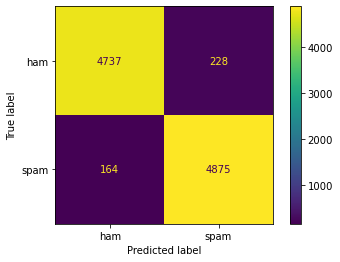

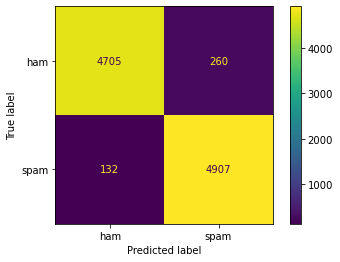

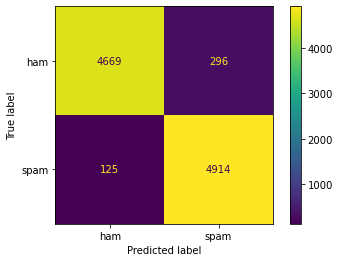

In [27]:
model = MultinomialNB()


#Uni-Gram Model Training
print ("UNI GRAM ")
# define true labels from train set
x_train = train_data_cv_uni
x_test = test_data_cv_uni

# build model on the training data
model.fit(x_train, Y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

#Metrics

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions,zero_division=1))
plot_confusion_matrix(model, x_test, Y_test)

#BI-Gram Model Training
print ("\nBI GRAM \n")
# define true labels from train set
x_train = train_data_cv_bi
x_test = test_data_cv_bi

# build model on the training data
model.fit(x_train, Y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

#Metrics

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions,zero_division=1))
plot_confusion_matrix(model, x_test, Y_test)

#Tri-Gram Model Training
print ("\nTRI GRAM \n")
# define true labels from train set
x_train = train_data_cv_tri
x_test = test_data_cv_tri

# build model on the training data
model.fit(x_train, Y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

#Metrics

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions,zero_division=1))
plot_confusion_matrix(model, x_test, Y_test)

## Naive Bayes using TF-IDF (Uni, Bi and Tri Gram)

In [28]:
train_text = X_train
test_text = X_test

tf=tfidfVec(1,1000)
print("Uni Gram Freatures: \n")
train_data_tf_uni = tf.train_text(train_text)
test_data_tf_uni = tf.test_text(test_text)

tf=tfidfVec(2,1000)
print("Bi Gram Freatures: \n")
train_data_tf_bi = tf.train_text(train_text)
test_data_tf_bi = tf.test_text(test_text)

tf=tfidfVec(3,1000)
print("Tri Gram Freatures: \n")
train_data_tf_tri = tf.train_text(train_text)
test_data_tf_tri = tf.test_text(test_text)

Uni Gram Freatures: 

Shape of Train Data after TF-IDF Vectorization:  (23341, 1000) 

Shape of Test Data after TF-IDF Vectorization:  (10004, 1000) 

Bi Gram Freatures: 

Shape of Train Data after TF-IDF Vectorization:  (23341, 1000) 

Shape of Test Data after TF-IDF Vectorization:  (10004, 1000) 

Tri Gram Freatures: 

Shape of Train Data after TF-IDF Vectorization:  (23341, 1000) 

Shape of Test Data after TF-IDF Vectorization:  (10004, 1000) 



UNI GRAM 
Accuracy score:  0.9663134746101559
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97      4965
        spam       0.96      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004


BI GRAM 

Accuracy score:  0.9647141143542582
Individual label performance: 


/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.97      0.95      0.96      4965
        spam       0.96      0.97      0.97      5039

    accuracy                           0.96     10004
   macro avg       0.96      0.96      0.96     10004
weighted avg       0.96      0.96      0.96     10004


TRI GRAM 

Accuracy score:  0.963014794082367
Individual label performance: 


/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         ham       0.98      0.95      0.96      4965
        spam       0.95      0.98      0.96      5039

    accuracy                           0.96     10004
   macro avg       0.96      0.96      0.96     10004
weighted avg       0.96      0.96      0.96     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


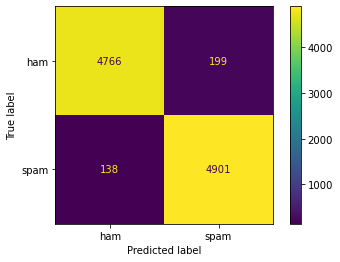

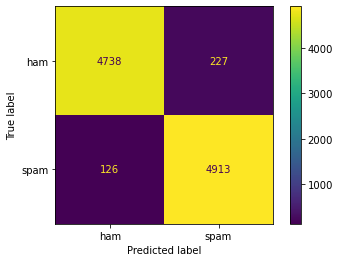

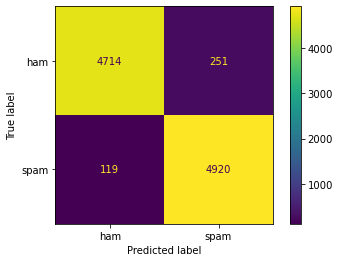

In [29]:
model = MultinomialNB()


#Uni-Gram Model Training
print ("UNI GRAM ")
# define true labels from train set
x_train = train_data_tf_uni
x_test = test_data_tf_uni

# build model on the training data
model.fit(x_train, Y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

#Metrics

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions,zero_division=1))
plot_confusion_matrix(model, x_test, Y_test)

#BI-Gram Model Training
print ("\nBI GRAM \n")
# define true labels from train set
x_train = train_data_tf_bi
x_test = test_data_tf_bi

# build model on the training data
model.fit(x_train, Y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

#Metrics

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions,zero_division=1))
plot_confusion_matrix(model, x_test, Y_test)

#Tri-Gram Model Training
print ("\nTRI GRAM \n")
# define true labels from train set
x_train = train_data_tf_tri
x_test = test_data_tf_tri

# build model on the training data
model.fit(x_train, Y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

#Metrics

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions,zero_division=1))
plot_confusion_matrix(model, x_test, Y_test)

## SVM - Count Vectorizer


UNI GRAM 



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score:  0.9691123550579768
Individual label performance: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4965
           1       0.97      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004


BI GRAM 



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score:  0.9681127548980408
Individual label performance: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4965
           1       0.97      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004


TRI GRAM 

Accuracy score:  0.9669132347061176
Individual label performance: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4965
           1       0.96      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


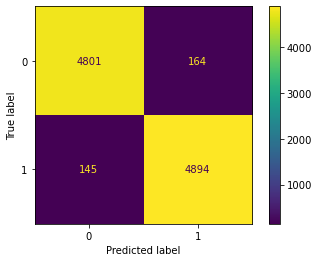

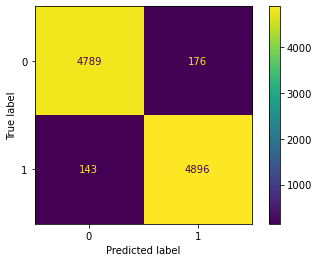

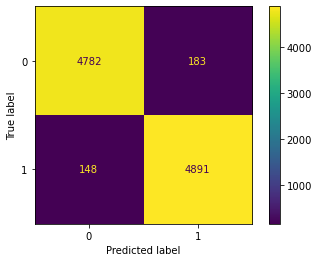

In [30]:
le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.fit_transform(Y_test)

sc = StandardScaler(with_mean=False)
clf = svm.LinearSVC()

# UniGram 
print ("\nUNI GRAM \n")
x_train = train_data_cv_uni
x_test = test_data_cv_uni

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Create SVM model

clf.fit(x_train_std, y_train)

# Metric
predictions = clf.predict(x_test_std)

print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions,zero_division=1))
plot_confusion_matrix(clf, x_test_std, y_test)

# BiGram 
print ("\nBI GRAM \n")
x_train = train_data_cv_bi
x_test = test_data_cv_bi

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Create SVM model

clf.fit(x_train_std, y_train)

# Metric
predictions = clf.predict(x_test_std)

print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions,zero_division=1))
plot_confusion_matrix(clf, x_test_std, y_test)

# TriGram 
print ("\nTRI GRAM \n")
x_train = train_data_cv_tri
x_test = test_data_cv_tri

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Create SVM model

clf.fit(x_train_std, y_train)

# Metric
predictions = clf.predict(x_test_std)

print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions,zero_division=1))
plot_confusion_matrix(clf, x_test_std, y_test)

## SVM- TF-IDF


UNI GRAM 



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score:  0.9689124350259896
Individual label performance: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4965
           1       0.97      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004


BI GRAM 



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score:  0.9686125549780088
Individual label performance: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4965
           1       0.97      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004


TRI GRAM 

Accuracy score:  0.9675129948020792
Individual label performance: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4965
           1       0.97      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


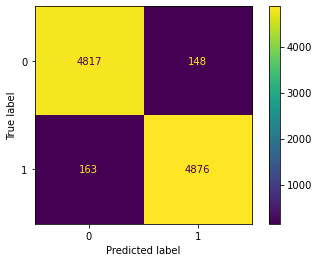

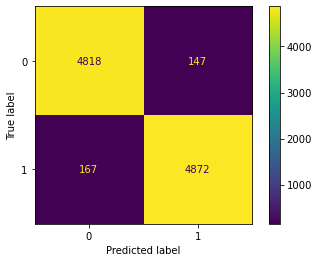

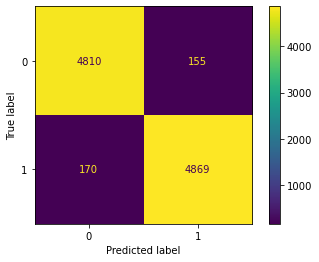

In [31]:
le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.fit_transform(Y_test)

sc = StandardScaler(with_mean=False)
clf = svm.LinearSVC()

# UniGram 
print ("\nUNI GRAM \n")
x_train = train_data_tf_uni
x_test = test_data_tf_uni

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Create SVM model

clf.fit(x_train_std, y_train)

# Metric
predictions = clf.predict(x_test_std)

print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions,zero_division=1))
plot_confusion_matrix(clf, x_test_std, y_test)

# BiGram 
print ("\nBI GRAM \n")
x_train = train_data_tf_bi
x_test = test_data_tf_bi

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Create SVM model

clf.fit(x_train_std, y_train)

# Metric
predictions = clf.predict(x_test_std)

print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions,zero_division=1))
plot_confusion_matrix(clf, x_test_std, y_test)

# TriGram 
print ("\nTRI GRAM \n")
x_train = train_data_tf_tri
x_test = test_data_tf_tri

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Create SVM model

clf.fit(x_train_std, y_train)

# Metric
predictions = clf.predict(x_test_std)

print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions,zero_division=1))
plot_confusion_matrix(clf, x_test_std, y_test)

## KNN - Count Vectorizer


UNI GRAM 

Accuracy score:  0.925529788084766
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.94      0.91      0.92      4965
        spam       0.91      0.94      0.93      5039

    accuracy                           0.93     10004
   macro avg       0.93      0.93      0.93     10004
weighted avg       0.93      0.93      0.93     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



BI GRAM 

Accuracy score:  0.9247301079568173
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.94      0.90      0.92      4965
        spam       0.91      0.95      0.93      5039

    accuracy                           0.92     10004
   macro avg       0.93      0.92      0.92     10004
weighted avg       0.93      0.92      0.92     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



TRI GRAM 

Accuracy score:  0.9266293482606958
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.94      0.91      0.92      4965
        spam       0.91      0.95      0.93      5039

    accuracy                           0.93     10004
   macro avg       0.93      0.93      0.93     10004
weighted avg       0.93      0.93      0.93     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


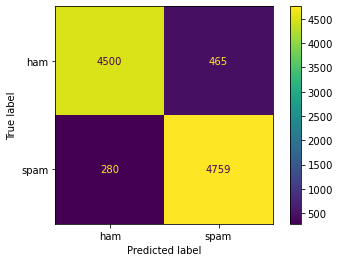

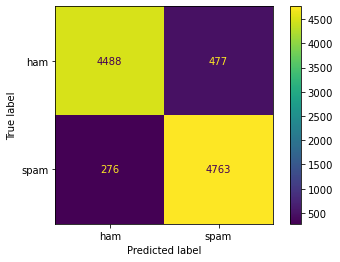

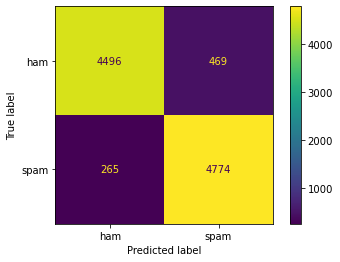

In [32]:
neigh = KNeighborsClassifier(n_neighbors=4)

# UniGram 
print ("\nUNI GRAM \n")
x_train = train_data_cv_uni
x_test = test_data_cv_uni

# Create KNN model

neigh.fit(x_train, Y_train)

# Metric
predictions = neigh.predict(x_test)

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions))
plot_confusion_matrix(neigh, x_test, Y_test)

# BiGram 
print ("\nBI GRAM \n")
x_train = train_data_cv_bi
x_test = test_data_cv_bi

# Create KNN model

neigh.fit(x_train, Y_train)

# Metric
predictions = neigh.predict(x_test)

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions))
plot_confusion_matrix(neigh, x_test, Y_test)


# TriGram 
print ("\nTRI GRAM \n")
x_train = train_data_cv_tri
x_test = test_data_cv_tri

# Create KNN model

neigh.fit(x_train, Y_train)

# Metric
predictions = neigh.predict(x_test)

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions))
plot_confusion_matrix(neigh, x_test, Y_test)

## KNN - TF-IDF


UNI GRAM 

Accuracy score:  0.8046781287485006
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.96      0.64      0.76      4965
        spam       0.73      0.97      0.83      5039

    accuracy                           0.80     10004
   macro avg       0.84      0.80      0.80     10004
weighted avg       0.84      0.80      0.80     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



BI GRAM 

Accuracy score:  0.816673330667733
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.96      0.66      0.78      4965
        spam       0.74      0.97      0.84      5039

    accuracy                           0.82     10004
   macro avg       0.85      0.82      0.81     10004
weighted avg       0.85      0.82      0.81     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



TRI GRAM 

Accuracy score:  0.8170731707317073
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.96      0.66      0.78      4965
        spam       0.74      0.97      0.84      5039

    accuracy                           0.82     10004
   macro avg       0.85      0.82      0.81     10004
weighted avg       0.85      0.82      0.81     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


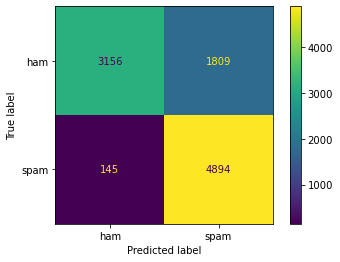

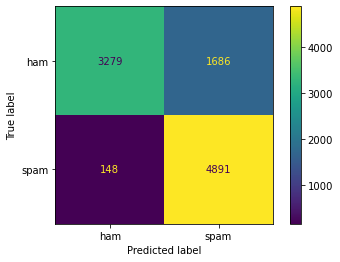

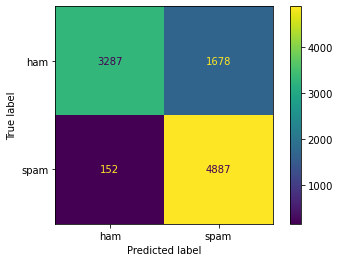

In [33]:
neigh = KNeighborsClassifier(n_neighbors=4)

# UniGram 
print ("\nUNI GRAM \n")
x_train = train_data_tf_uni
x_test = test_data_tf_uni

# Create KNN model

neigh.fit(x_train, Y_train)

# Metric
predictions = neigh.predict(x_test)

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions))
plot_confusion_matrix(neigh, x_test, Y_test)

# BiGram 
print ("\nBI GRAM \n")
x_train = train_data_tf_bi
x_test = test_data_tf_bi

# Create KNN model

neigh.fit(x_train, Y_train)

# Metric
predictions = neigh.predict(x_test)

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions))
plot_confusion_matrix(neigh, x_test, Y_test)


# TriGram 
print ("\nTRI GRAM \n")
x_train = train_data_tf_tri
x_test = test_data_tf_tri

# Create KNN model

neigh.fit(x_train, Y_train)

# Metric
predictions = neigh.predict(x_test)

print ("Accuracy score: ", accuracy_score(Y_test, predictions))
print ("Individual label performance: ")
print (classification_report(Y_test, predictions))
plot_confusion_matrix(neigh, x_test, Y_test)

## Best Feature Chi2 using Naive Bayes (Unigram)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   5.4s
[Pipeline] . (step 2 of 3) Processing k_best_chi_square, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing mnb, total=   0.0s

Accuracy score with k = 1000 Chi-Squared:  0.9735105957616953
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97      4965
        spam       0.97      0.97      0.97      5039

    accuracy                           0.97     10004
   macro avg       0.97      0.97      0.97     10004
weighted avg       0.97      0.97      0.97     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


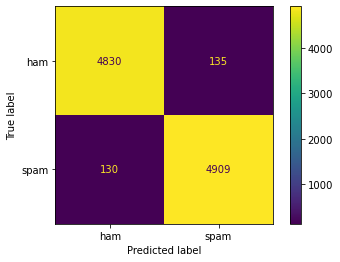

In [34]:
# K Best Features with Chi Square (K=1000)

pipeline = Pipeline([('vectorizer',  TfidfVectorizer(ngram_range = [1,1])), ('k_best_chi_square', SelectKBest(chi2, k=1000)), ('mnb', MultinomialNB())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_k1000_chi = pipeline.predict(X_test)

print ("\nAccuracy score with k = 1000 Chi-Squared: ", accuracy_score(Y_test, prediction_k1000_chi))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_k1000_chi))
plot_confusion_matrix(pipeline, X_test, Y_test)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.3s
[Pipeline] . (step 2 of 3) Processing k_best_chi_square, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing mnb, total=   0.0s

Accuracy score with k = 5000 Chi-Squared:  0.9794082367053178
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      4965
        spam       0.98      0.98      0.98      5039

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


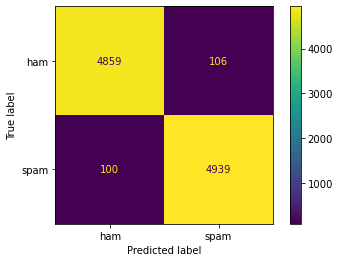

In [35]:
# K Best Features with Chi Square (K=5000)

pipeline = Pipeline([('vectorizer',  TfidfVectorizer(ngram_range = [1,1])), ('k_best_chi_square', SelectKBest(chi2, k=5000)), ('mnb', MultinomialNB())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_k1000_chi = pipeline.predict(X_test)

print ("\nAccuracy score with k = 5000 Chi-Squared: ", accuracy_score(Y_test, prediction_k1000_chi))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_k1000_chi))
plot_confusion_matrix(pipeline, X_test, Y_test)

## Best Feature Chi2 using SVM (Unigram)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.4s
[Pipeline] . (step 2 of 3) Processing k_best_chi_square, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.1s

Accuracy score with k = 1000 Chi-Squared:  0.9810075969612155
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      4965
        spam       0.97      0.99      0.98      5039

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


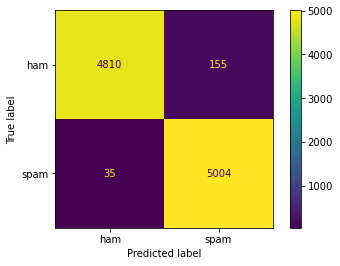

In [36]:
# K Best Features with Chi Square (K=1000)

pipeline = Pipeline([('vectorizer',  TfidfVectorizer(ngram_range = [1,1])), ('k_best_chi_square', SelectKBest(chi2, k=1000)), ('svc', svm.LinearSVC())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_k1000_chi = pipeline.predict(X_test)

print ("\nAccuracy score with k = 1000 Chi-Squared: ", accuracy_score(Y_test, prediction_k1000_chi))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_k1000_chi))
plot_confusion_matrix(pipeline, X_test, Y_test)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.3s
[Pipeline] . (step 2 of 3) Processing k_best_chi_square, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.1s

Accuracy score with k = 5000 Chi-Squared:  0.9862055177928829
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      4965
        spam       0.98      0.99      0.99      5039

    accuracy                           0.99     10004
   macro avg       0.99      0.99      0.99     10004
weighted avg       0.99      0.99      0.99     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


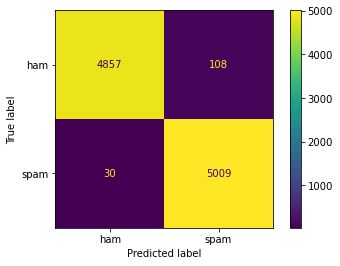

In [37]:
# K Best Features with Chi Square (K=5000)

pipeline = Pipeline([('vectorizer', TfidfVectorizer(ngram_range = [1,1])), ('k_best_chi_square', SelectKBest(chi2, k=5000)), ('svc', svm.LinearSVC())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_k1000_chi = pipeline.predict(X_test)

print ("\nAccuracy score with k = 5000 Chi-Squared: ", accuracy_score(Y_test, prediction_k1000_chi))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_k1000_chi))
plot_confusion_matrix(pipeline, X_test, Y_test)

## Naive Bayes using Variance Threshold (Unigram)

In [38]:
selector = VarianceThreshold(threshold = 0.001)
vectorizer = CountVectorizer(ngram_range = [1,1])

vector_train = vectorizer.fit_transform(X_train)
vector_test = vectorizer.transform(X_test)

x_train = vector_train
x_test = vector_test

X_train_features_filtered_var_thr = selector.fit(vector_train).transform(vector_train)
print ("Train feature space before filtering: ", X_train.shape)
print ("Train feature space after filtering: ", X_train_features_filtered_var_thr.shape)


X_test_features_filtered_var_thr = selector.transform(vector_test)
print ("Test feature space before filtering: ", X_test.shape)
print ("Test feature space after filtering: ", X_test_features_filtered_var_thr.shape)

Train feature space before filtering:  (23341,)
Train feature space after filtering:  (23341, 14910)
Test feature space before filtering:  (10004,)
Test feature space after filtering:  (10004, 14910)


[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.3s
[Pipeline] ............ (step 2 of 3) Processing var_th, total=   0.2s
[Pipeline] ............... (step 3 of 3) Processing mnb, total=   0.0s

Accuracy score with 0.001 variance threshold:  0.9805077968812475
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      4965
        spam       0.98      0.98      0.98      5039

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


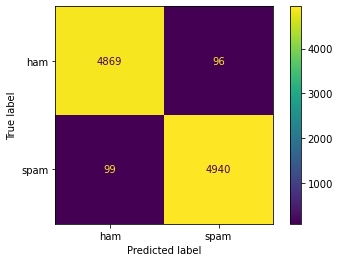

In [39]:
# Variance (0.001)

pipeline = Pipeline([('vectorizer',  CountVectorizer(ngram_range = [1,1])), ('var_th', VarianceThreshold(threshold = 0.001)), ('mnb', MultinomialNB())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_variance_1 = pipeline.predict(X_test)

print ("\nAccuracy score with 0.001 variance threshold: ", accuracy_score(Y_test, prediction_variance_1))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_variance_1))
plot_confusion_matrix(pipeline, X_test, Y_test)

In [40]:
selector = VarianceThreshold(threshold = 0.005)
vectorizer = CountVectorizer(ngram_range = [1,1])

vector_train = vectorizer.fit_transform(X_train)
vector_test = vectorizer.transform(X_test)

x_train = vector_train
x_test = vector_test

X_train_features_filtered_var_thr = selector.fit(vector_train).transform(vector_train)
print ("Train feature space before filtering: ", X_train.shape)
print ("Train feature space after filtering: ", X_train_features_filtered_var_thr.shape)


X_test_features_filtered_var_thr = selector.transform(vector_test)
print ("Test feature space before filtering: ", X_test.shape)
print ("Test feature space after filtering: ", X_test_features_filtered_var_thr.shape)

Train feature space before filtering:  (23341,)
Train feature space after filtering:  (23341, 6380)
Test feature space before filtering:  (10004,)
Test feature space after filtering:  (10004, 6380)


[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.4s
[Pipeline] ............ (step 2 of 3) Processing var_th, total=   0.2s
[Pipeline] ............... (step 3 of 3) Processing mnb, total=   0.0s

Accuracy score with 0.005 variance threshold:  0.9765093962415033
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      4965
        spam       0.98      0.98      0.98      5039

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


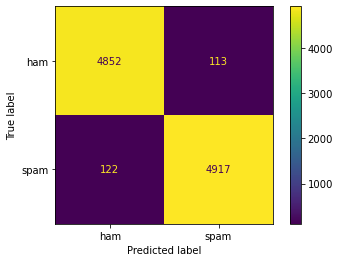

In [41]:
# Variance (0.005)

pipeline = Pipeline([('vectorizer',  CountVectorizer(ngram_range = [1,1])), ('var_th', VarianceThreshold(threshold = 0.005)), ('mnb', MultinomialNB())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_variance_1 = pipeline.predict(X_test)

print ("\nAccuracy score with 0.005 variance threshold: ", accuracy_score(Y_test, prediction_variance_1))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_variance_1))
plot_confusion_matrix(pipeline, X_test, Y_test)

## SVM using Variance Threshold (Unigram)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.2s
[Pipeline] ............ (step 2 of 3) Processing var_th, total=   0.2s


/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.4s

Accuracy score with 0.001 variance threshold:  0.9804078368652539
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      4965
        spam       0.98      0.98      0.98      5039

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


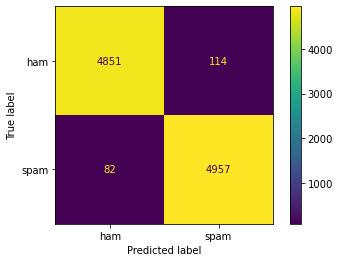

In [42]:
# Variance (0.001)

pipeline = Pipeline([('vectorizer',  CountVectorizer(ngram_range = [1,1])), ('var_th', VarianceThreshold(threshold = 0.001)), ('svc', svm.LinearSVC())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_variance_1 = pipeline.predict(X_test)

print ("\nAccuracy score with 0.001 variance threshold: ", accuracy_score(Y_test, prediction_variance_1))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_variance_1))
plot_confusion_matrix(pipeline, X_test, Y_test)

[Pipeline] ........ (step 1 of 3) Processing vectorizer, total=   2.6s
[Pipeline] ............ (step 2 of 3) Processing var_th, total=   0.1s


/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.3s

Accuracy score with 0.005 variance threshold:  0.978608556577369
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      4965
        spam       0.97      0.98      0.98      5039

    accuracy                           0.98     10004
   macro avg       0.98      0.98      0.98     10004
weighted avg       0.98      0.98      0.98     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


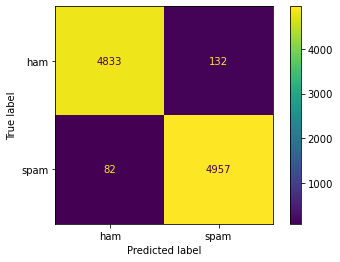

In [43]:
# Variance (0.005)

pipeline = Pipeline([('vectorizer',  CountVectorizer(ngram_range = [1,1])), ('var_th', VarianceThreshold(threshold = 0.005)), ('svc', svm.LinearSVC())], verbose = True)
 
pipeline.fit(X_train, Y_train)

prediction_variance_1 = pipeline.predict(X_test)

print ("\nAccuracy score with 0.005 variance threshold: ", accuracy_score(Y_test, prediction_variance_1))
print ("Individual label performance: ")
print (classification_report(Y_test, prediction_variance_1))
plot_confusion_matrix(pipeline, X_test, Y_test)

## Decision Tree using TF-IDF


Accuracy score with Gini Decision Tree:  0.9477209116353459
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.97      0.93      0.95      4965
        spam       0.93      0.97      0.95      5039

    accuracy                           0.95     10004
   macro avg       0.95      0.95      0.95     10004
weighted avg       0.95      0.95      0.95     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


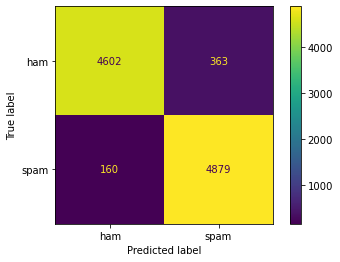

In [44]:
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 123,max_depth=35, min_samples_leaf=6)

x_train = train_data_tf_uni
x_test = test_data_tf_uni

# Performing training
model_gini.fit(x_train, Y_train)

# Prediction using gini
y_pred_gini = model_gini.predict(x_test, model_gini)

print ("\nAccuracy score with Gini Decision Tree: ", accuracy_score(Y_test, y_pred_gini))
print ("Individual label performance: ")
print (classification_report(Y_test, y_pred_gini))
plot_confusion_matrix(model_gini, x_test, Y_test)


Accuracy score with Gini Decision Tree:  0.9434226309476209
Individual label performance: 
              precision    recall  f1-score   support

         ham       0.96      0.92      0.94      4965
        spam       0.92      0.97      0.95      5039

    accuracy                           0.94     10004
   macro avg       0.94      0.94      0.94     10004
weighted avg       0.94      0.94      0.94     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


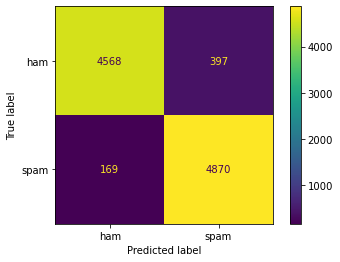

In [45]:
from sklearn.tree import DecisionTreeClassifier

model_ent = DecisionTreeClassifier(criterion = "entropy",
            random_state = 123,max_depth=35, min_samples_leaf=6)

x_train = train_data_tf_uni
x_test = test_data_tf_uni

# Performing training
model_ent.fit(x_train, Y_train)

# Prediction using gini
y_pred_ent = model_ent.predict(x_test, model_ent)

print ("\nAccuracy score with Gini Decision Tree: ", accuracy_score(Y_test, y_pred_ent))
print ("Individual label performance: ")
print (classification_report(Y_test, y_pred_ent))
plot_confusion_matrix(model_ent, x_test, Y_test)

## Word2Vec using SVM

In [46]:
xtrain_glove = transform_data_for_glove(glove,X_train)
xtest_glove = transform_data_for_glove(glove,X_test)

Word2Vec on Support Vector 


Accuracy score SVM:  0.962514994002399

Performance Metrics for SVM: 

              precision    recall  f1-score   support

         ham       0.97      0.95      0.96      4965
        spam       0.96      0.97      0.96      5039

    accuracy                           0.96     10004
   macro avg       0.96      0.96      0.96     10004
weighted avg       0.96      0.96      0.96     10004



/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


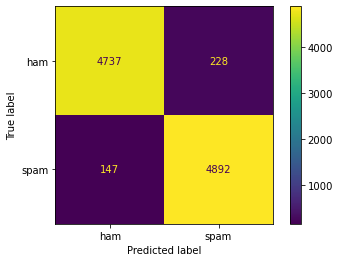

In [47]:
print ("Word2Vec on Support Vector ")
# define true labels from train set
x_train = xtrain_glove
x_test = xtest_glove

SVM = LinearSVC(max_iter=4000)
SVM.fit(x_train, Y_train)
predictions_svm = SVM.predict(x_test)

#Metrics
print()
print ("\nAccuracy score SVM: ", accuracy_score(Y_test, predictions_svm))
print()
print("Performance Metrics for SVM: ")
print()
print(classification_report(Y_test,predictions_svm))
plot_confusion_matrix(SVM, x_test, Y_test)